In [1]:
# Import libraries
import numpy as np
import pandas as pd

# !conda install -c conda-forge folium=0.5.0 --yes
# !conda install -c conda-forge geopy --yes
# !conda install -c conda-forge beautifulsoup4 --yes
# !pip install lxml

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

import requests
from bs4 import BeautifulSoup as bs4

In [2]:
# Locate geograpical coordinates of Utrecht.
address = 'Utrecht, Ut'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Utrecht are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Utrecht are 52.0949753, 5.109708.


In [3]:
# Get xls file of neighborhood statistics
xls_url = 'https://www.cbs.nl/-/media/cbs/dossiers/nederland-regionaal/wijk-en-buurtstatistieken/_exel/kwb-2019.xls'
df_xls = pd.read_excel(xls_url, index=False)
df_xls.head()

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,a_gesch,a_verwed,a_w_all,a_nw_all,a_marok,a_antaru,a_suri,a_tur,a_ov_nw,a_geb,p_geb,a_ste,p_ste,a_hh,a_1p_hh,a_hh_z_k,a_hh_m_k,g_hhgro,bev_dich,a_woning,g_woz,p_1gezw,p_mgezw,p_bewndw,p_leegsw,p_koopw,p_huurw,p_wcorpw,p_ov_hw,p_e_o_w,p_bjj2k,p_bjo2k,g_ele,g_ele_ap,g_ele_tw,g_ele_hw,g_ele_2w,g_ele_vw,g_ele_hu,g_ele_ko,g_gas,g_gas_ap,g_gas_tw,g_gas_hw,g_gas_2w,g_gas_vw,g_gas_hu,g_gas_ko,p_stadsv,a_inkont,g_ink_po,g_ink_pi,p_ink_li,p_ink_hi,p_n_act,p_hh_li,p_hh_hi,p_hh_lkk,p_hh_osm,a_soz_wb,a_soz_ao,a_soz_ww,a_soz_ow,g_wodief,g_vernoo,g_gewsek,a_bedv,a_bed_a,a_bed_bf,a_bed_gi,a_bed_hj,a_bed_kl,a_bed_mn,a_bed_ru,a_pau,a_bst_b,a_bst_nb,g_pau_hh,g_pau_km,a_m2w,g_afs_hp,g_afs_gs,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
0,NL00,0,Nederland,Nederland,Land,NL00,.,17282163,8581086,8701077,2739819,2131944,4255450,4840946,3314004,8374133,6706554,1343033,858443,1774271,2311867,402492,160120,353909,409877,985469,NaN,NaN,NaN,NaN,7924691,3037622,2282297,2604772,"2,1",513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4154338,3367109,787228,.,.,2,1994
1,GM0003,3,Appingedam,Appingedam,Gemeente,GM0003,.,11721,5720,6001,1718,1238,2376,3491,2898,4981,4874,1048,818,850,834,46,103,80,256,349,NaN,NaN,NaN,NaN,5531,2097,1729,1705,"2,1",493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2458,2378,80,.,.,3,1067
2,WK000300,300,Wijk 00,Appingedam,Wijk,WK000300,1,11720,5720,6000,1715,1235,2375,3490,2895,4980,4875,1045,815,850,835,45,100,80,255,350,NaN,NaN,NaN,NaN,5530,2095,1730,1705,"2,1",493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2458,2378,80,.,.,3,1067
3,BU00030000,30000,Appingedam-Centrum,Appingedam,Buurt,BU00030000,1,2370,1135,1230,230,225,500,715,700,985,850,285,245,145,90,0,15,10,10,55,NaN,NaN,NaN,NaN,1315,705,355,250,"1,7",2812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,84,5,9901,1,3,1210
4,BU00030001,30001,Appingedam-West,Appingedam,Buurt,BU00030001,1,3035,1505,1530,480,350,570,990,640,1285,1415,210,120,160,125,0,20,5,35,55,NaN,NaN,NaN,NaN,1335,365,485,480,"2,3",1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163,158,5,9903,6,4,903


In [4]:
# Filter the data so we only have the neighborhood data
df = df_xls[df_xls['recs'] == 'Buurt']

# Retreive the columns we will be using and rename them
df = pd.DataFrame(df, columns = ['regio', 'gm_naam', 'a_inw', 'a_65_oo'])
df = df.rename(columns={"regio": "neighborhood", "a_inw": "total", "a_65_oo": "over65yo"})

# Filter the data so we only have the data from the city Utrecht
df_ut = df[df['gm_naam'] == "Utrecht"]

# Drop the index
df_ut = df_ut.reset_index(drop=True)

# Drop the region column
df_ut = df_ut.drop(['gm_naam'], axis=1)
df_ut.head()

,neighborhood,total,over65yo
0,"Welgelegen, Den Hommel",1500,340
1,Oog in Al,4370,435
2,Halve Maan-Zuid,1465,220
3,Halve Maan-Noord,1710,145
4,Lombok-Oost,2290,195


In [5]:
# Add percentage of citizens above 65 of below 15 years of age.
df_ut['percentage_over65yo'] = df_ut['over65yo']/df_ut['total']*100
df_ut.head()

,neighborhood,total,over65yo,percentage_over65yo
0,"Welgelegen, Den Hommel",1500,340,22.666667
1,Oog in Al,4370,435,9.954233
2,Halve Maan-Zuid,1465,220,15.017065
3,Halve Maan-Noord,1710,145,8.479532
4,Lombok-Oost,2290,195,8.515284


In [6]:
# Read file containing information on the average distance to a general practitioner
htmlfile = 'nabijheid.html'
df_ut_nh = pd.read_html(htmlfile)
df_ut_nh = df_ut_nh[0]

# Cleaning up the data
df_ut_nh.drop(['Unnamed: 2_level_0', 'Unnamed: 1_level_0'], axis=1, inplace=True)
df_ut_nh.drop([0, 2, 3], axis=0, inplace=True)
df_ut_nh.columns = df_ut_nh.columns.droplevel(0)
df_ut_nh.set_index('Onderwerp', inplace=True)

# Transpose the dataframe
df_ut_nh = df_ut_nh.transpose()

# Filter the data so we only have the neighborhood data
df_ut_nh = df_ut_nh[df_ut_nh['Soort regio'] == 'Buurt']

# Drop the neighborhood column
df_ut_nh = df_ut_nh.drop(['Soort regio'], axis=1)

# Reset index
df_ut_nh.reset_index(inplace=True)

# Rename column
df_ut_nh = df_ut_nh.rename(columns={"index": "Buurt"})
df_ut_nh.head()

Onderwerp,Buurt,Gezondheid en welzijnHuisartsenpraktijkAfstand tot huisartsenpraktijk,Aantal huisartsenpraktijkenBinnen 1 km,Binnen 3 km,Binnen 5 km,Afstand tot huisartsenpost,Afstand tot apotheek,Ziekenhuis (incl. buitenpolikliniek)Afstand tot ziekenhuis,Aantal ziekenhuizenBinnen 5 km,Binnen 10 km,Binnen 20 km,Ziekenhuis (excl. buitenpolikliniek)Afstand tot ziekenhuis,Aantal ziekenhuizenBinnen 5 km,Binnen 10 km,Binnen 20 km,Afstand tot consultatiebureau,FysiotherapeutAfstand tot fysiotherapeut,Aantal fysiotherapeutenBinnen 1 km,Binnen 3 km,Binnen 5 km,DetailhandelWinkels dagelijkse boodschappenAfstand tot grote supermarkt,Aantal grote supermarktenBinnen 1 km,Binnen 3 km,Binnen 5 km,Afstand tot ov. dagel. levensmiddelen,Aantal overige dagelijkse levensmiddelenBinnen 1 km,Binnen 3 km,Binnen 5 km,WarenhuisAfstand tot warenhuis,Aantal warenhuizenBinnen 5 km,Binnen 10 km,Binnen 20 km,HorecaCafés en dergelijkeAfstand tot café e.d.,Aantal cafésBinnen 1 km,Binnen 3 km,Binnen 5 km,Cafetaria's en dergelijkeAfstand tot cafetaria e.d.,Aantal cafetaria's e.d.Binnen 1 km,Binnen 3 km,Binnen 5 km,RestaurantsAfstand tot restaurant,Aantal restaurantsBinnen 1 km,Binnen 3 km,Binnen 5 km,Hotels en dergelijkeAfstand tot hotel e.d.,Aantal hotels e.d.Binnen 5 km,Binnen 10 km,Binnen 20 km,KinderopvangKinderdagverblijfAfstand tot kinderdagverblijf,Aantal kinderdagverblijvenBinnen 1 km,Binnen 3 km,Binnen 5 km,Buitenschoolse opvangAfstand tot buitenschoolse opvang,Aantal buitenschoolse opvangBinnen 1 km,Binnen 3 km,Binnen 5 km,OnderwijsBasisonderwijsAfstand tot school,Aantal scholenBinnen 1 km,Binnen 3 km,Binnen 5 km,Voortgezet onderwijsVoortgezet onderwijs totaalAfstand tot school,Aantal scholenBinnen 3 km,Binnen 5 km,Binnen 10 km,VmboAfstand tot school,Aantal scholenBinnen 3 km,Binnen 5 km,Binnen 10 km,Havo/vwoAfstand tot school,Aantal scholenBinnen 3 km,Binnen 5 km,Binnen 10 km,GroenvoorzieningenOpenbaar groenAfstand tot openbaar groen totaal,Afstand tot park of plantsoen,Afstand tot dagrecreatief terrein,Afstand tot bos,Afstand tot open natuurlijk terreinAfstand tot open nat. terrein totaal,Afstand tot open droog nat. terrein,Afstand tot open nat natuurlijk terrein,Semi-openbaar groenAfstand tot semi-openbaar groen totaal,Afstand tot sportterrein,Afstand tot volkstuin,Afstand tot verblijfsrecreatief terrein,Afstand tot begraafplaats,Afstand tot recreatief binnenwater,Verkeer en vervoerAfstand tot oprit hoofdverkeersweg,TreinstationsAfstand tot treinstations totaal,Afstand tot belangrijk overstapstation,Vrije tijd en cultuurAfstand tot bibliotheek,SportAfstand tot zwembad,Afstand tot kunstijsbaan,MuseumAfstand tot museum,Aantal museaBinnen 5 km,Binnen 10 km,Binnen 20 km,Podiumkunsten (excl. festivals)Afstand tot podiumkunsten totaal,Aantal podiumkunsten totaalBinnen 5 km,Binnen 10 km,Binnen 20 km,Afstand tot poppodium,BioscoopAfstand tot bioscoop,Aantal bioscopenBinnen 5 km,Binnen 10 km,Binnen 20 km,RecreatieAfstand tot sauna,Afstand tot zonnebank,Afstand tot attractie,Aantal attractiesBinnen 10 km,Binnen 20 km,Binnen 50 km,Afstand tot brandweerkazerne
0,"Welgelegen, Den Hommel",07,13,111,384,43,07,43,22,70,110,43,20,50,80,.,.,.,.,.,07,17,241,604,08,68,1286,2819,14,77,152,261,13,01,443,1045,07,39,1166,2831,03,67,1809,4175,04,256,332,578,04,64,441,1507,04,65,340,1034,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,16,18,18,09,07,58,27,90,142,253,16,81,106,183,27,16,70,98,150,35,13,30,46,90,496,28
1,Oog in Al,04,12,107,404,39,04,39,21,70,110,39,19,50,80,.,.,.,.,.,03,24,237,662,03,73,1175,2891,17,80,149,260,09,15,343,1036,03,58,939,2860,03,83,1354,4145,07,251,315,580,03,88,438,1564,02,97,304,1017,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,19,19,20,05,11,51,28,90,143,250,18,82,102,180,28,18,70,92,150,37,14,23,41,90,496,21
2,Halve Maan-Zuid,04,10,79,364,41,04,41,14,70,110,41,14,50,80,.,.,.,.,.,04,10,204,627,05,51,912,2761,16,80,145,260,13,00,183,1015,04,34,608,2771,04,34,744,4055,05,247,316,574,02,50,368,1461,03,77,282,934,.,.,.,.

In [7]:
# Add distance to general practitioner to the df_ut database
df_ut['distance_gp_km'] = df_ut_nh['Gezondheid en welzijnHuisartsenpraktijkAfstand tot huisartsenpraktijk']

# Convert Distance GP column to float and convert '.' to numerical 0
df_ut['distance_gp_km'] = pd.to_numeric(df_ut['distance_gp_km'].str.replace('.', '0', regex=False), downcast='float')

# Make sure the distance is in km
df_ut['distance_gp_km'] = df_ut['distance_gp_km']/10
df_ut.head()

,neighborhood,total,over65yo,percentage_over65yo,distance_gp_km
0,"Welgelegen, Den Hommel",1500,340,22.666667,0.7
1,Oog in Al,4370,435,9.954233,0.4
2,Halve Maan-Zuid,1465,220,15.017065,0.4
3,Halve Maan-Noord,1710,145,8.479532,0.7
4,Lombok-Oost,2290,195,8.515284,0.5


In [8]:
!wget --quiet https://ckan.dataplatform.nl/dataset/5713301f-c5cc-48b3-ae2a-8a107a6129f3/resource/ddc3fcba-ba33-47d4-8ef8-fad31b4013bc/download/buurten-utrecht.geojson -O utrecht.geojson

In [9]:
# Load json file
jsonfile = 'utrecht.geojson' # geojson file

with open(jsonfile, encoding="latin-1") as f:
    ut_geo = json.load(f)

In [10]:
# Make sure properties are the same
for i, row in enumerate(df_ut.values):
    ut_geo['features'][i]['properties']['NAAM'] = df_ut['neighborhood'][i]

In [11]:
# Remove business parks
df_ut = df_ut[df_ut['neighborhood'].str.contains("Bedr") == False]

In [12]:
# Create map
ut_map = folium.Map(location=[latitude, longitude], zoom_start=12)

ut_map.choropleth(
    geo_data=ut_geo,
    data=df_ut,
    columns=['neighborhood', 'total'],
    key_on='feature.properties.NAAM',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population of citizens in Utrecht'
)

plt.savefig('choropleth_1.png')

ut_map

<Figure size 432x288 with 0 Axes>

In [13]:
# Create map
ut_map = folium.Map(location=[latitude, longitude], zoom_start=12)

ut_map.choropleth(
    geo_data=ut_geo,
    data=df_ut,
    columns=['neighborhood', 'over65yo'],
    key_on='feature.properties.NAAM',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population of citizens over 65 years of age in Utrecht'
)

plt.savefig('choropleth_2.png')

ut_map

<Figure size 432x288 with 0 Axes>

In [14]:
# Create map
ut_map = folium.Map(location=[latitude, longitude], zoom_start=12)

ut_map.choropleth(
    geo_data=ut_geo,
    data=df_ut,
    columns=['neighborhood', 'percentage_over65yo'],
    key_on='feature.properties.NAAM',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Percentage of citizens over 65 years of age in Utrecht'
)

plt.savefig('choropleth_3.png')

ut_map

<Figure size 432x288 with 0 Axes>

In [15]:
# Create map
ut_map = folium.Map(location=[latitude, longitude], zoom_start=12)

ut_map.choropleth(
    geo_data=ut_geo,
    data=df_ut,
    columns=['neighborhood', 'distance_gp_km'],
    key_on='feature.properties.NAAM',
    fill_color='BuPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average distance to a general practitioner in km'
)

plt.savefig('choropleth_4.png')

ut_map

<Figure size 432x288 with 0 Axes>

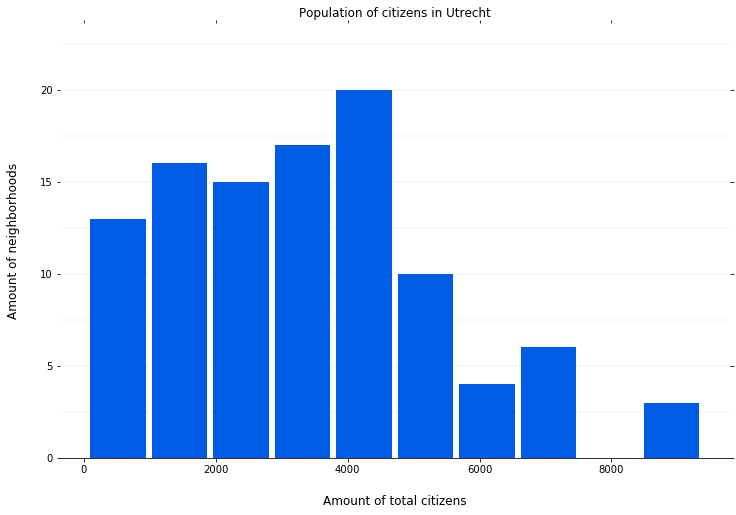

In [16]:
ax = df_ut.hist(column='total', bins=10, grid=False, figsize=(12,8), color='#005ce6', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, alpha=0.4, color='#eeeeee', zorder=1)
    x.set_title("Population of citizens in Utrecht")
    x.set_xlabel("Amount of total citizens", labelpad=20, size=12)
    x.set_ylabel("Amount of neighborhoods", labelpad=20, size=12)
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

plt.savefig('hist_1.png')

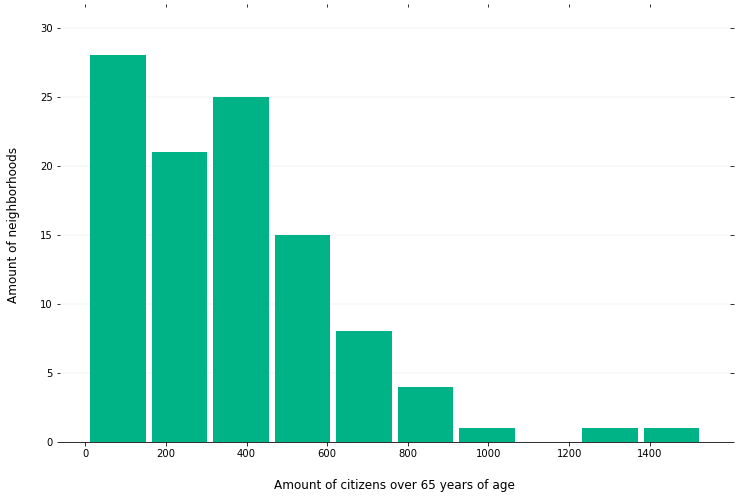

In [17]:
ax = df_ut.hist(column='over65yo', bins=10, grid=False, figsize=(12,8), color='#00b386', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, alpha=0.4, color='#eeeeee', zorder=1)
    x.set_title("")
    x.set_xlabel("Amount of citizens over 65 years of age", labelpad=20, size=12)
    x.set_ylabel("Amount of neighborhoods", labelpad=20, size=12)
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
plt.savefig('hist_2.png')

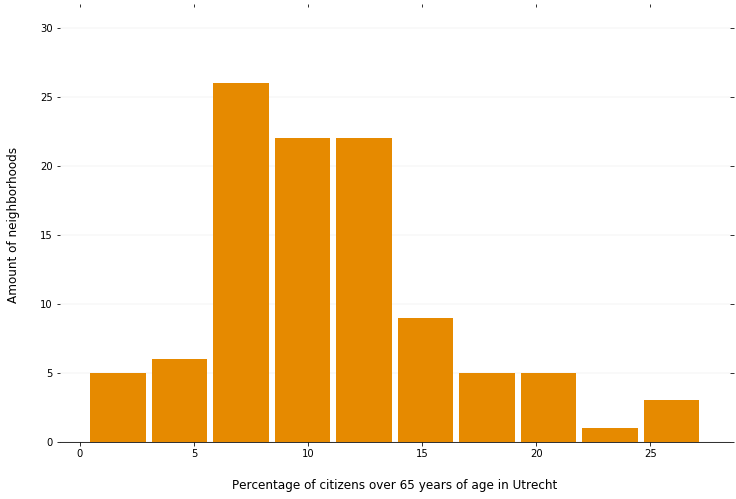

In [18]:
ax = df_ut.hist(column='percentage_over65yo', bins=10, grid=False, figsize=(12,8), color='#e68a00', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, alpha=0.4, color='#eeeeee', zorder=1)
    x.set_title("")
    x.set_xlabel("Percentage of citizens over 65 years of age in Utrecht", labelpad=20, size=12)
    x.set_ylabel("Amount of neighborhoods", labelpad=20, size=12)
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
plt.savefig('hist_3.png')

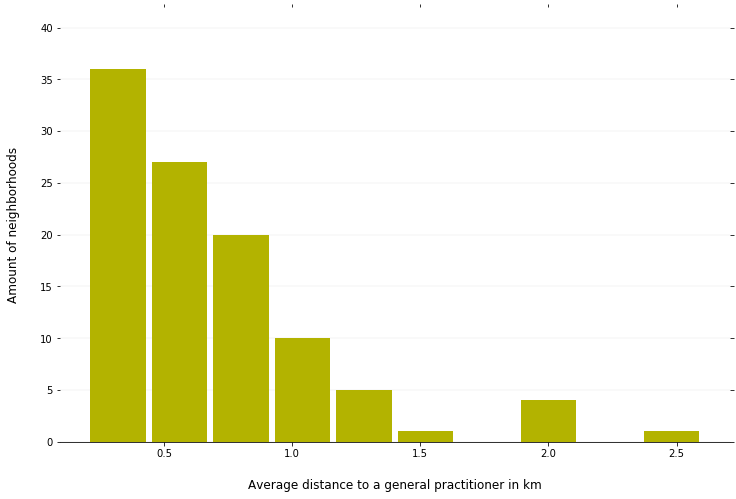

In [19]:
ax = df_ut.hist(column='distance_gp_km', bins=10, grid=False, figsize=(12,8), color='#b3b300', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, alpha=0.4, color='#eeeeee', zorder=1)
    x.set_title("")
    x.set_xlabel("Average distance to a general practitioner in km", labelpad=20, size=12)
    x.set_ylabel("Amount of neighborhoods", labelpad=20, size=12)
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    
plt.savefig('hist_4.png')

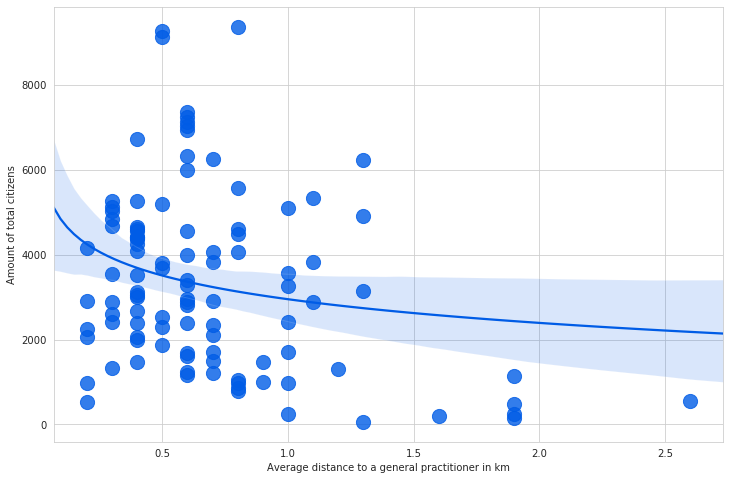

In [20]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

ax = sns.regplot(x='distance_gp_km', y='total', data=df_ut, color='#005ce6', scatter_kws={'s': 200}, logx=True)
ax.set(xlabel='Average distance to a general practitioner in km', ylabel='Amount of total citizens')
ax.set_title('')

plt.savefig('regplot_1.png')

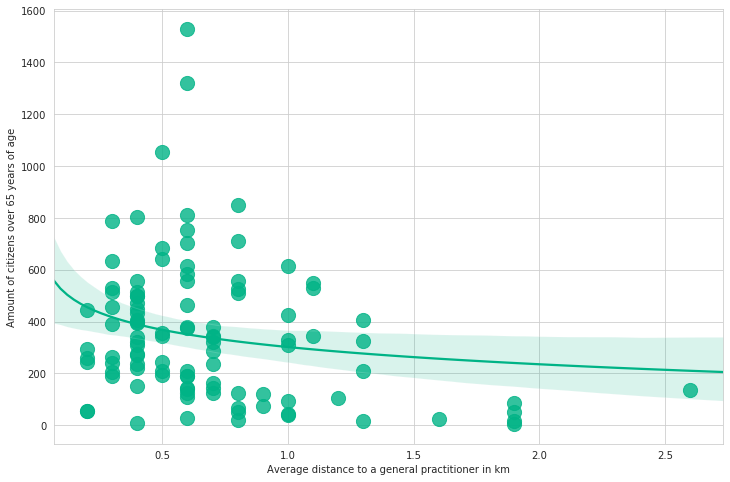

In [21]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

ax = sns.regplot(x='distance_gp_km', y='over65yo', data=df_ut, color='#00b386', scatter_kws={'s': 200}, logx=True)
ax.set(xlabel='Average distance to a general practitioner in km', ylabel='Amount of citizens over 65 years of age')
ax.set_title('')

plt.savefig('regplot_2.png')

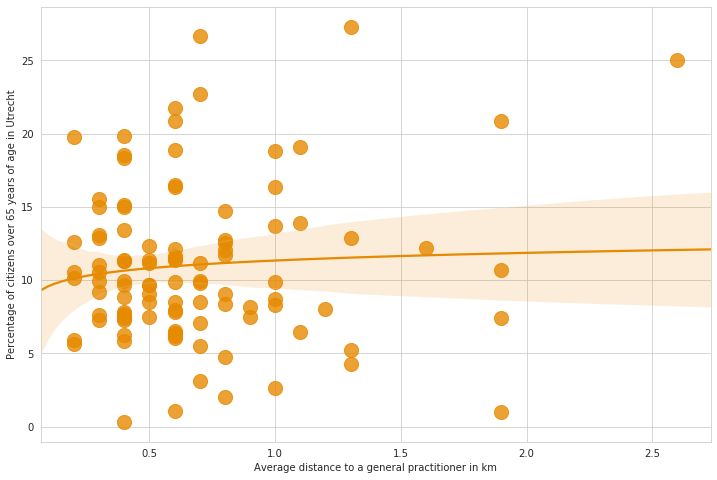

In [22]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

ax = sns.regplot(x='distance_gp_km', y='percentage_over65yo', data=df_ut, color='#e68a00', scatter_kws={'s': 200}, logx=True)
ax.set(xlabel='Average distance to a general practitioner in km', ylabel='Percentage of citizens over 65 years of age in Utrecht')
ax.set_title('')

plt.savefig('regplot_3.png')

In [23]:
X1 = df_ut[['distance_gp_km','over65yo']].to_numpy()
y1 = df_ut[['distance_gp_km','over65yo']].to_numpy()

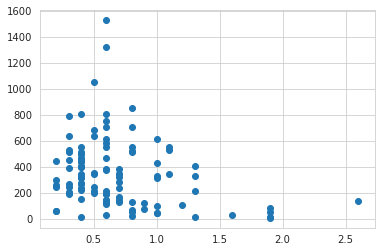

In [24]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

plt.savefig('scatter_1.png')

In [25]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0])

In [26]:
df_ut['cluster_'] = agglom.labels_
df_ut.head()

,neighborhood,total,over65yo,percentage_over65yo,distance_gp_km,cluster_
0,"Welgelegen, Den Hommel",1500,340,22.666667,0.7,0
1,Oog in Al,4370,435,9.954233,0.4,0
2,Halve Maan-Zuid,1465,220,15.017065,0.4,0
3,Halve Maan-Noord,1710,145,8.479532,0.7,0
4,Lombok-Oost,2290,195,8.515284,0.5,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

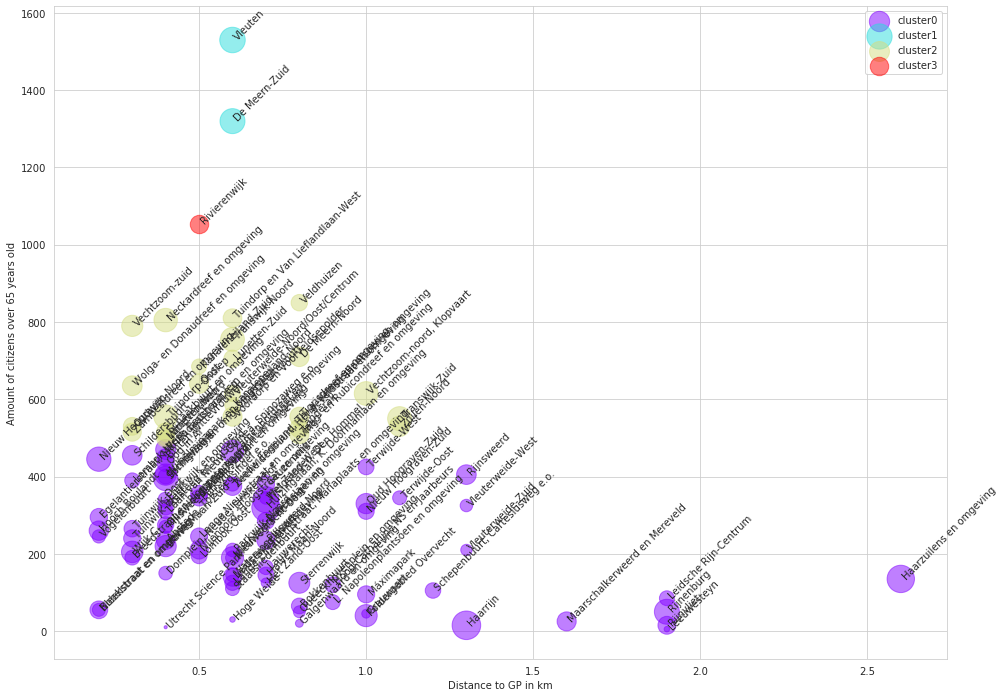

In [27]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,12))

for color, label in zip(colors, cluster_labels):
    subset = df_ut[df_ut.cluster_ == label]
    for i in subset.index:
            plt.text(subset.distance_gp_km[i], subset.over65yo[i],str(subset['neighborhood'][i]), rotation=45) 
    plt.scatter(subset.distance_gp_km, subset.over65yo, s= subset.percentage_over65yo*30, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.distance_gp_km, subset.over65yo)
plt.legend()
plt.title('')
plt.xlabel('Distance to GP in km')
plt.ylabel('Amount of citizens over 65 years old')

plt.savefig('scatter_2.png')

In [28]:
agg_65 = df_ut.groupby(['cluster_'])['over65yo','percentage_over65yo','distance_gp_km','cluster_'].mean()
agg_65

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,over65yo,percentage_over65yo,distance_gp_km,cluster_
cluster_,,,,
0,227.039474,10.102878,0.719737,0.0
1,1425.000000,21.284788,0.600000,1.0
2,621.600000,12.608977,0.600000,2.0
3,1055.000000,11.362412,0.500000,3.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

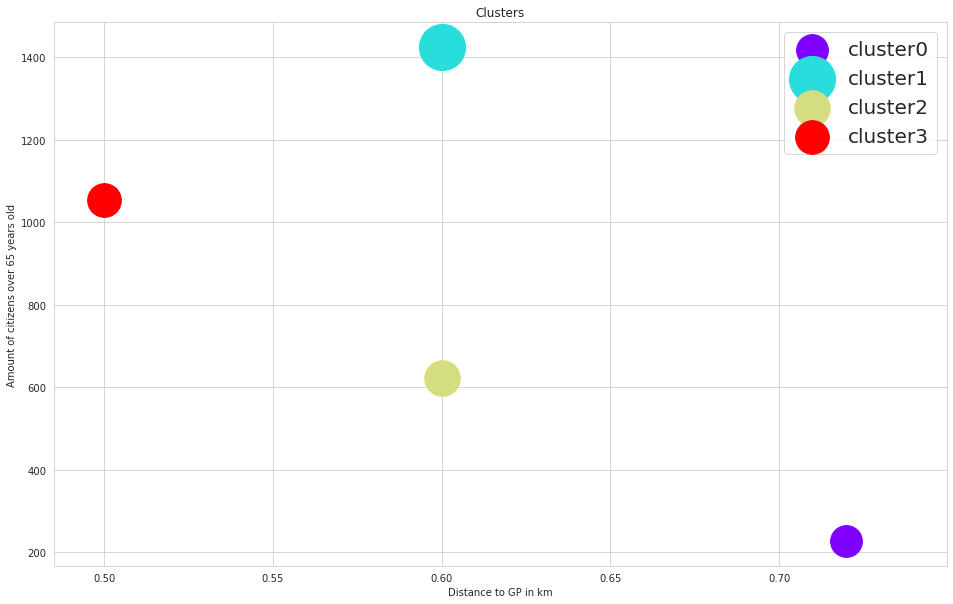

In [29]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_65.loc[(label,),]
    plt.scatter(subset.distance_gp_km, subset.over65yo, s=subset.percentage_over65yo*100, c=color, label='cluster'+str(label))
plt.legend(prop={'size': 20})
plt.title('Clusters')
plt.xlabel('Distance to GP in km')
plt.ylabel('Amount of citizens over 65 years old')

plt.savefig('scatter_3.png')

In [30]:
df_ut[df_ut['cluster_'] == 1]['neighborhood']

101          Vleuten
108    De Meern-Zuid
Name: neighborhood, dtype: object